0.905


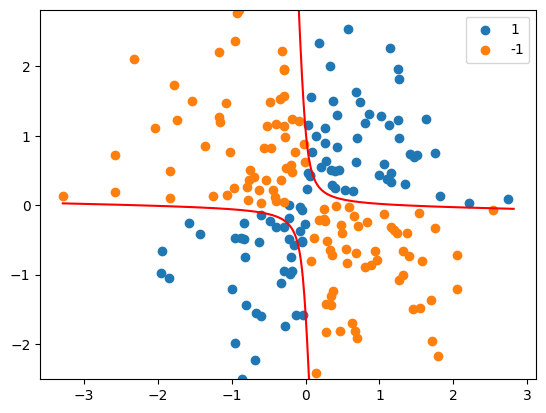

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def y_activate(x_1,x_2):
    if x_1 * x_2 >= 0:
        return 1
    else:
        return -1

def sign(x_1):
    if x_1 > 0:
        return 1
    else:
        return -1
 

X = np.random.randn(200,2)
A = np.zeros([200,6])
y = np.array([y_activate(X[i,0],X[i,1]) for i in range(len(X))])
for i in range(len(X)):
    x = X[i]
    x_1,x_2 = x[0],x[1]
    A[i,:] = np.array([1,x_1,x_2,x_1**2,x_1*x_2,x_2**2])

opt_theta = np.linalg.lstsq(A,y,rcond = None)[0]
y_spl = A@opt_theta
ind_x = []
ind_y = []
ind = []
for i in range(len(X)):
    if sign(y_spl[i]) != y[i]:
        ind_x.append(X[i,0])
        ind_y.append(X[i,1])
        ind.append(i)

not_ind_x = []
not_ind_y = []

def solve_quadratic(a,b,c):
    first = (-b + np.sqrt(b**2 -4*a*c))/(2*a)
    second = (-b - np.sqrt(b**2 -4*a*c))/(2*a)
    return first,second

X_1 = np.linspace(np.min(X[:,0]),np.max(X[:,1]),1000)
first_s = []
second_s = []


for x_1 in X_1:
    c =opt_theta[0]* 1+ opt_theta[1]*x_1+opt_theta[3]*x_1**2
    b = opt_theta[4]*x_1*x_2 + opt_theta[2]
    a = opt_theta[5]
    first,second =solve_quadratic(a,b,c)
    first_s.append(first)
    second_s.append(second)



for j in range(len(X)):
    if j not in set(ind):
        not_ind_x.append(X[j,0])
        not_ind_y.append(X[j,1])
accuracy = len(not_ind_x)/len(X)
print(accuracy)

plt.scatter(X[y==1,0],X[y==1,1],label = "1")
plt.scatter(X[y!=1,0],X[y!=1,1],label = "-1")

plt.plot(X_1,first_s,color = "red")
plt.plot(X_1,second_s,color= "red")

plt.ylim(np.min(X[:,1]),np.max(X[:,1]))
plt.legend()
plt.show()
